## Run MOFAcell pipeline on features

In [1]:
import muon as mu
import liana as li
import numpy as np
import mofax as mofa
from plotnine import *

/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


In [2]:
features = mu.read_h5mu("../../data/celltype_features.h5mu")

/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.


In [3]:
n_factors = 6

In [4]:
for modality_name, modality_data in features.mod.items():
    print(f"Modality name: {modality_name}")
    # Center and scale each column of the data, ignoring NA values
    modality_data.X = modality_data.X - np.nanmean(modality_data.X, axis=0, keepdims=True)
    modality_data.X = modality_data.X / np.nanstd(modality_data.X, axis=0)

Modality name: Other_immune_cell
Modality name: Fibroblast
Modality name: Macrophage
Modality name: CD4_lymphocyte
Modality name: Epithelial_cell
Modality name: Endothelial_cell
Modality name: Monocyte
Modality name: Cytotoxic_lymphocyte


In [5]:
mu.tl.mofa(features,
           use_obs='union',
           convergence_mode='medium',
           scale_groups=False,
           scale_views=False,
           n_factors=n_factors,
           seed=1337,
           outfile='../../data/mofacell_sim.h5ad',
           use_var=None
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Other_immune_cell' group='group1' with N=423 samples and D=33 features...
Loaded view='Fibroblast' group='group1' with N=423 samples and D=29 features...
Loaded view='Macrophage' group='group1' with N=423 samples and D=28 features...
Loaded view='CD4_lymphocyte' group='group1' with N=423 samples and D=21 features...
Loaded view='Epithelial_cell' group='group1' with 

In [6]:
# obtain factor scores
factor_scores = li.ut.get_factor_scores(features, obsm_key='X_mofa', obs_keys=['Stage'])
factor_scores.head()

,index,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Stage
0,A1a,2.581007,0.867458,-2.965828,1.882371,-2.760420,-0.323575,pT3
1,A1c,0.760669,-1.178807,-0.160130,1.107578,0.201260,-0.012903,pT4
2,A1d,1.187232,0.312089,-1.324351,0.870168,0.995072,0.527420,pT3
3,A1e,1.643636,-0.406289,0.967862,1.508985,-0.488052,-1.657582,pT4
4,A1f,1.848617,0.377720,-1.025226,1.298111,-0.632840,0.561581,pT1


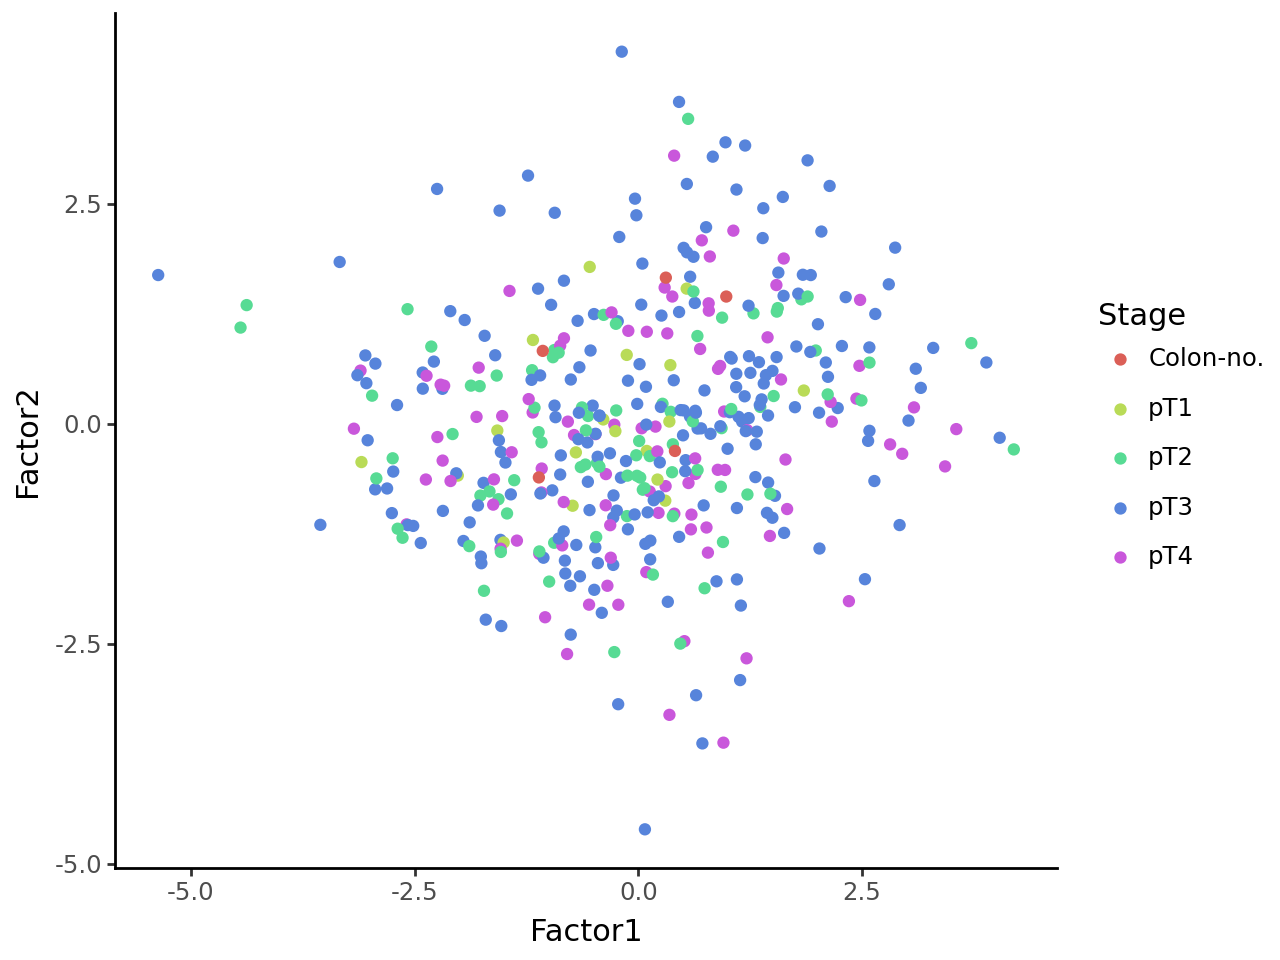

In [7]:
ggplot(factor_scores, aes(x='Factor1', y='Factor2', color='Stage')) + geom_point() + theme_classic()

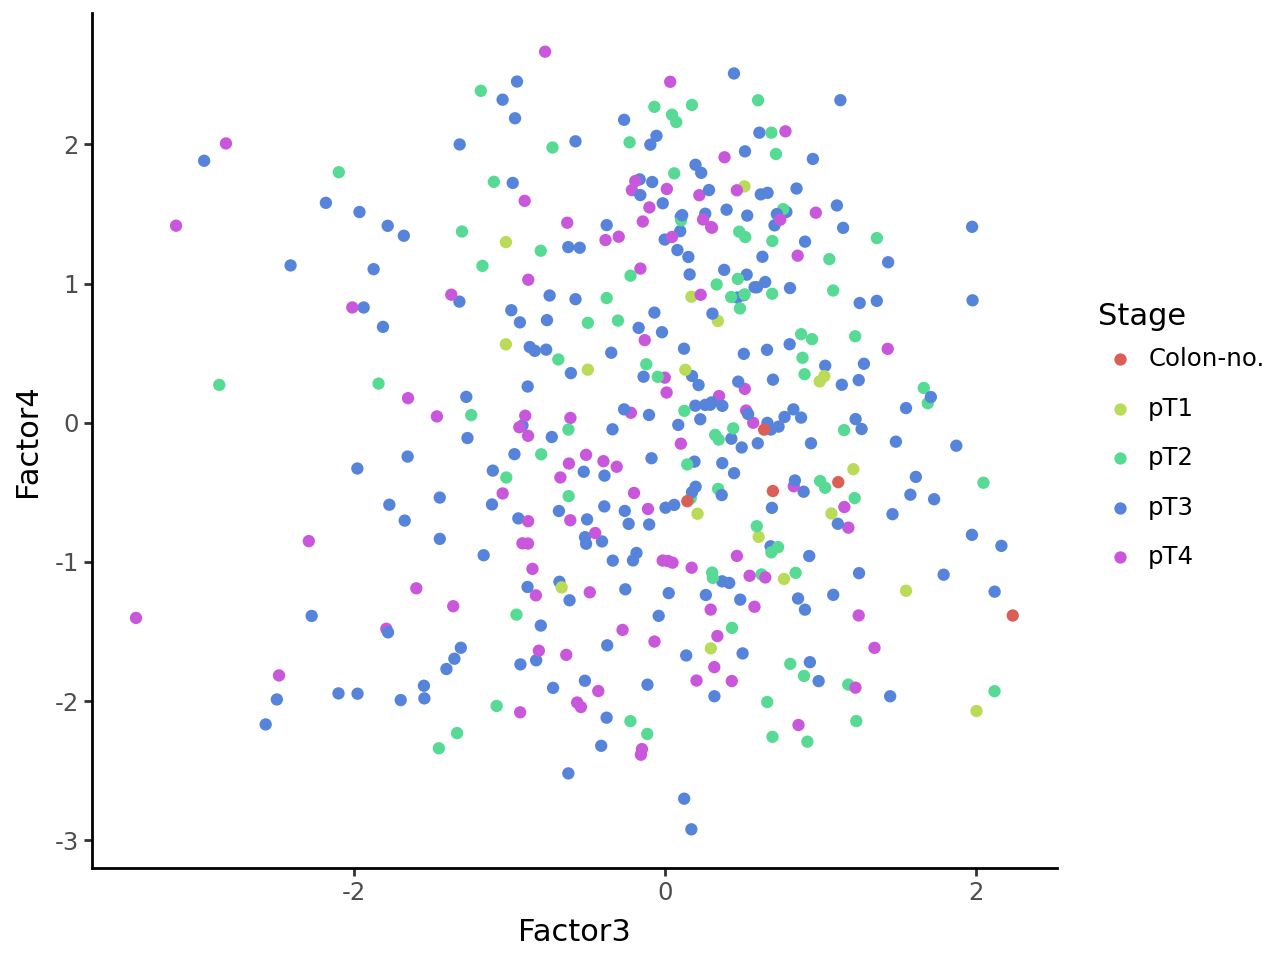

In [8]:
ggplot(factor_scores, aes(x='Factor3', y='Factor4', color='Stage')) + geom_point() + theme_classic()

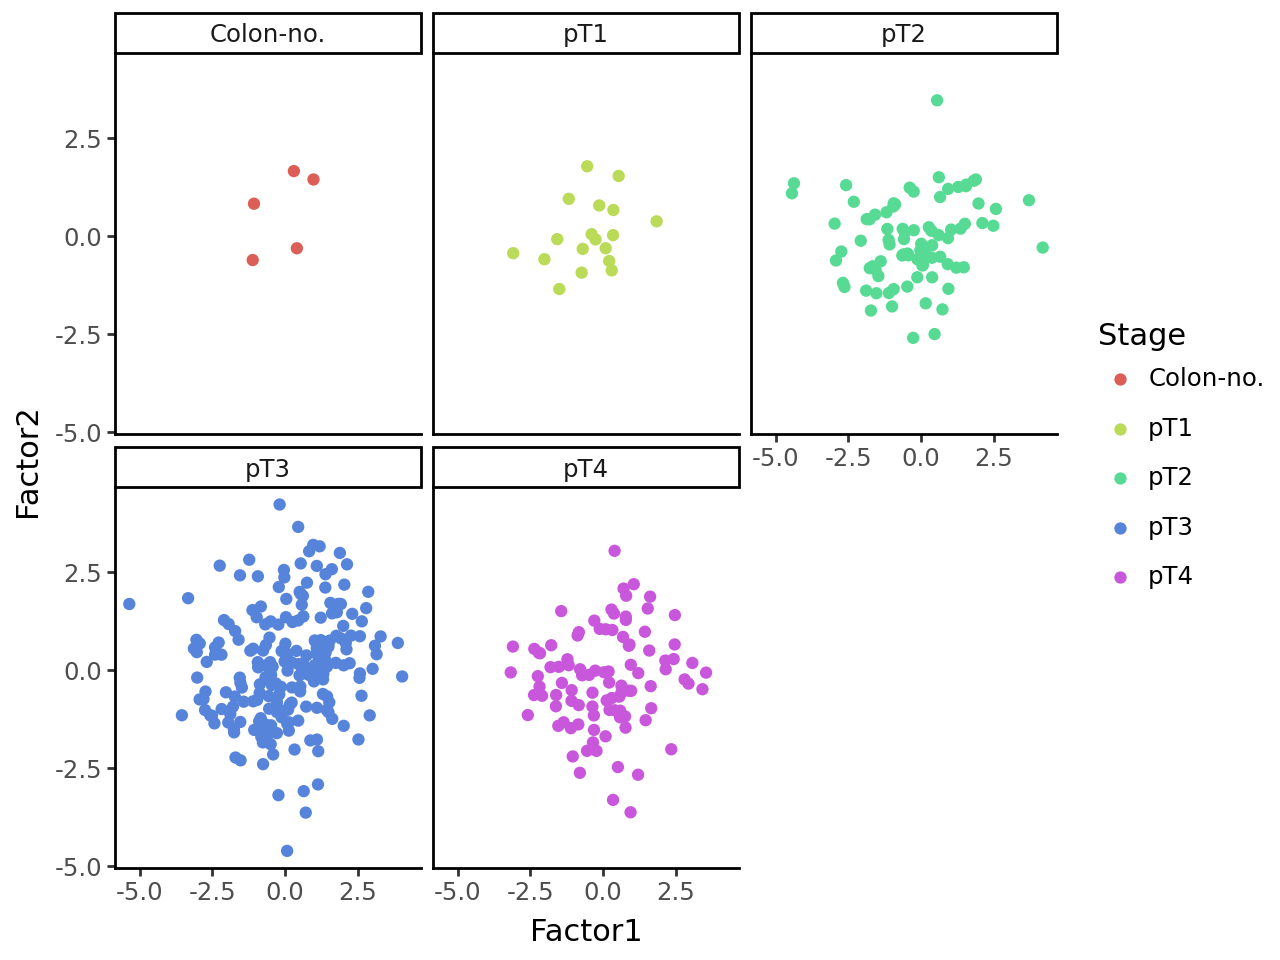

In [9]:
ggplot(factor_scores, aes(x='Factor1', y='Factor2', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

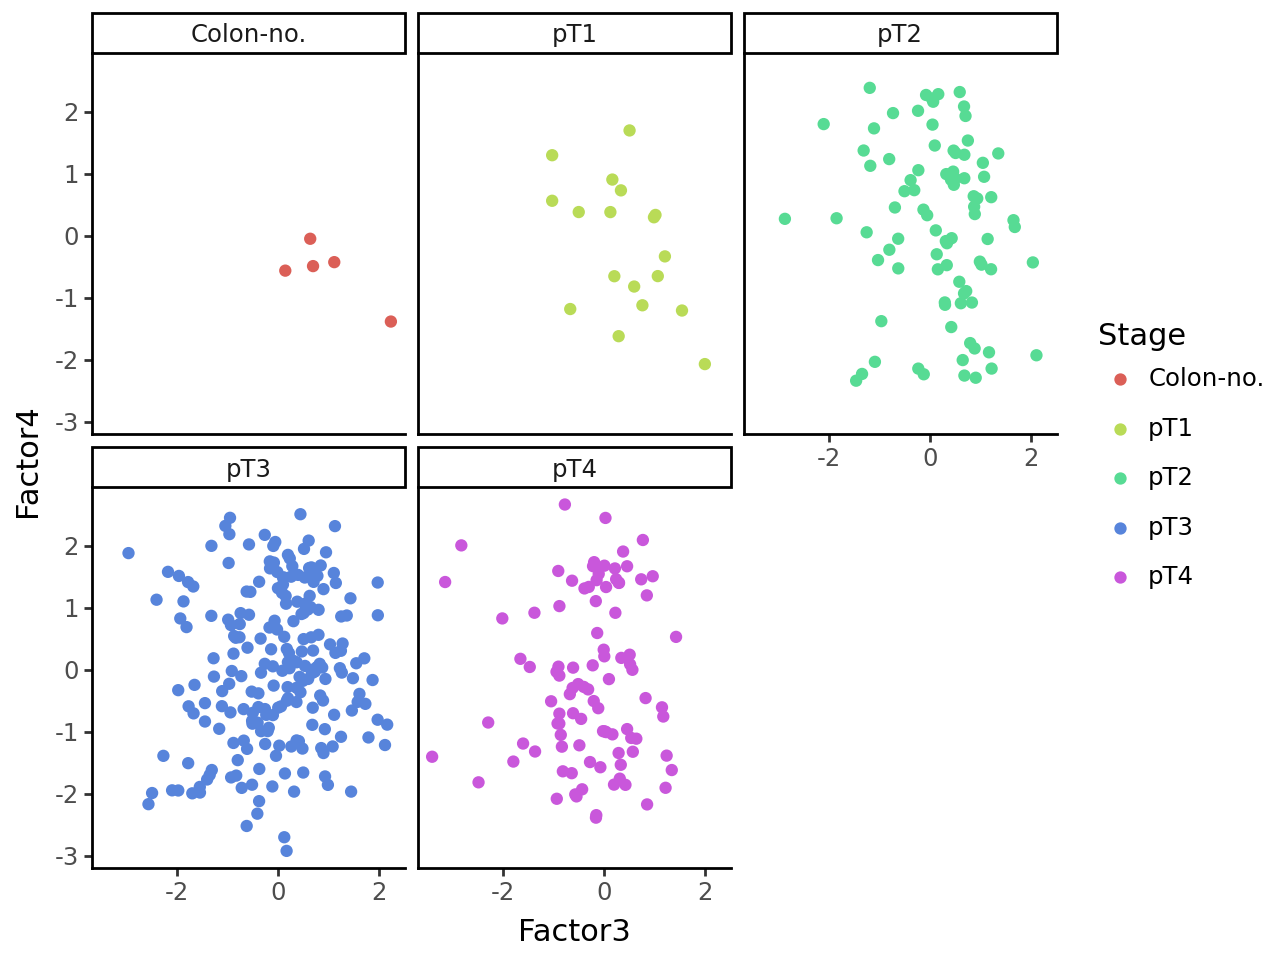

In [10]:
ggplot(factor_scores, aes(x='Factor3', y='Factor4', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

In [11]:
variable_loadings = li.ut.get_variable_loadings(features, varm_key='LFs') # get loadings

In [12]:
# Add cell type (view) to the variable loadings
variable_loadings['view'] = ''
for view in features.mod.keys():
    variable_loadings.loc[np.arange(len(features.varm[view]))[features.varm[view]],"view"] = view
    
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False) # Default
variable_loadings.head()

,index,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,view
221,area,-0.423233,0.311658,0.080055,-0.009270,-0.009453,0.023915,Monocyte
196,area,-0.418512,0.237401,-0.028745,0.006187,0.000024,0.021292,Endothelial_cell
220,perimeter,-0.407163,0.304604,0.131794,-0.002446,-0.006557,0.020767,Monocyte
195,perimeter,-0.404673,0.242351,-0.006716,0.027709,0.000134,0.018725,Endothelial_cell
224,area_std,-0.391767,0.262362,-0.098121,-0.052117,0.011824,-0.000246,Monocyte


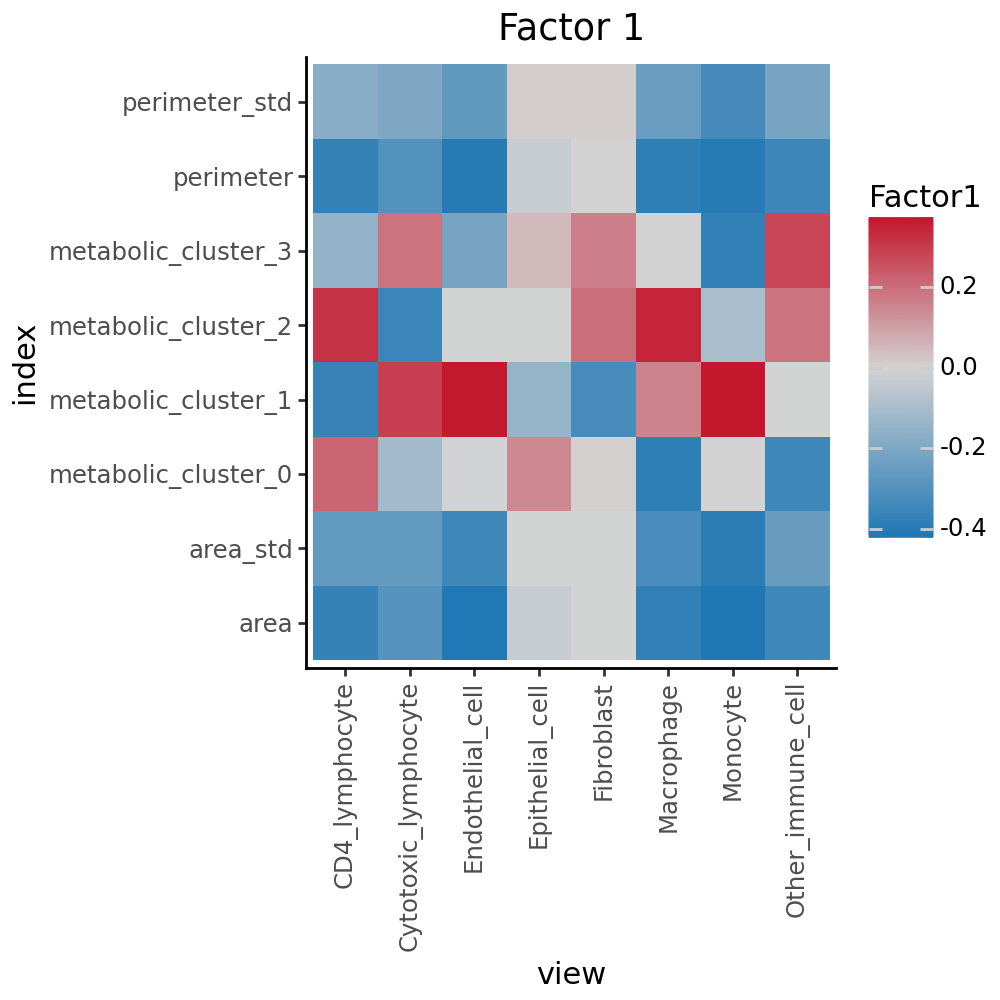

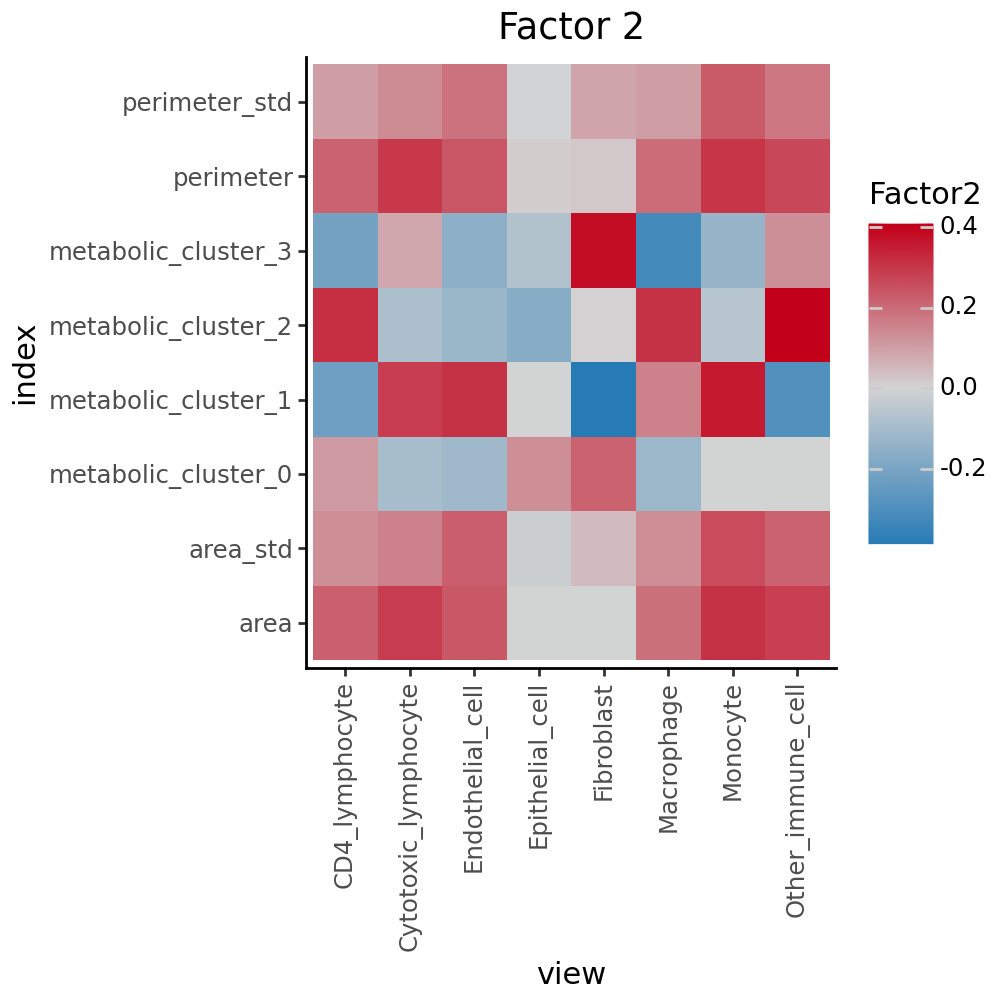

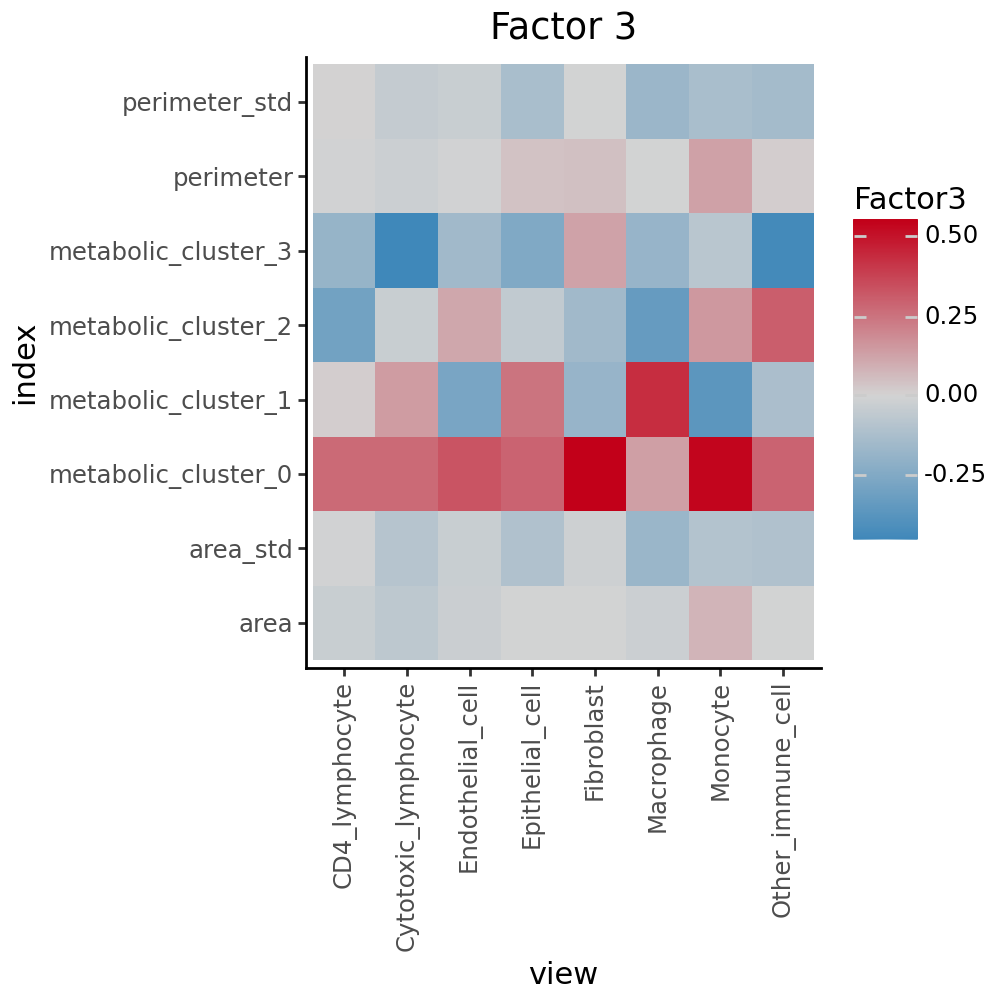

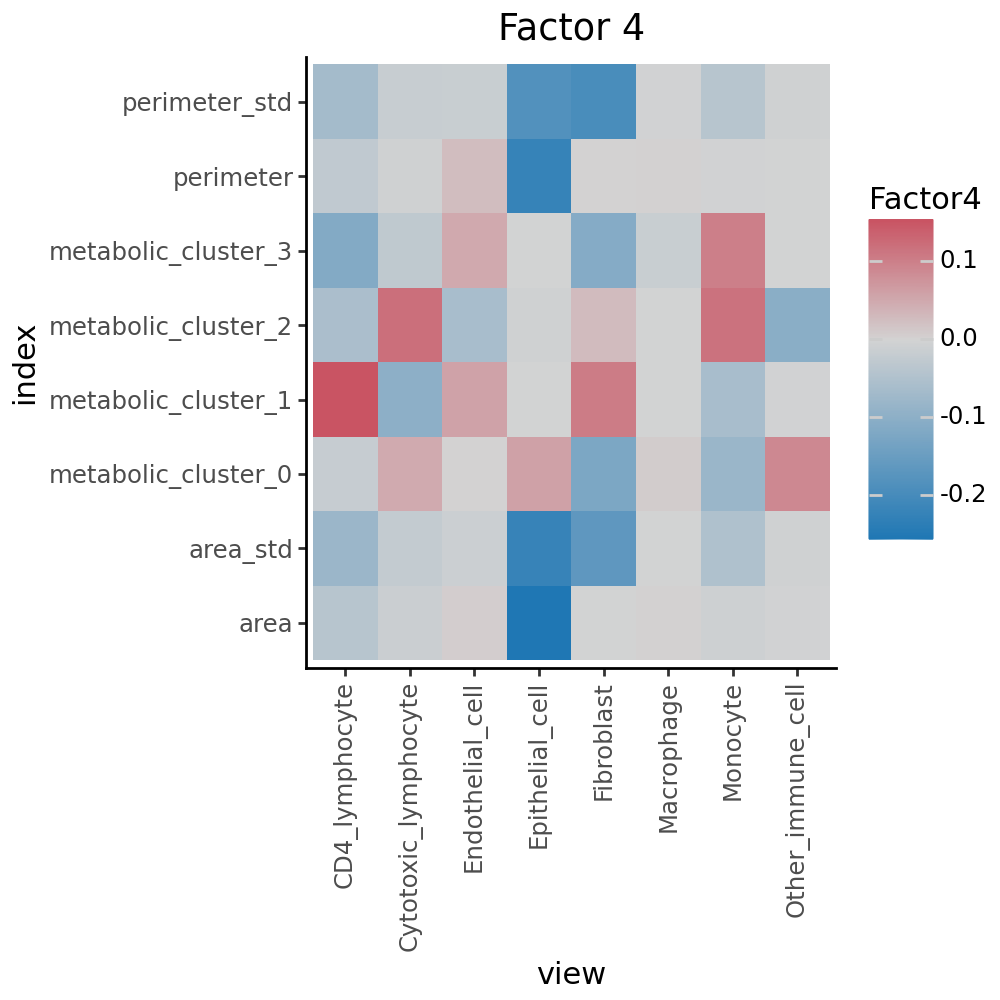

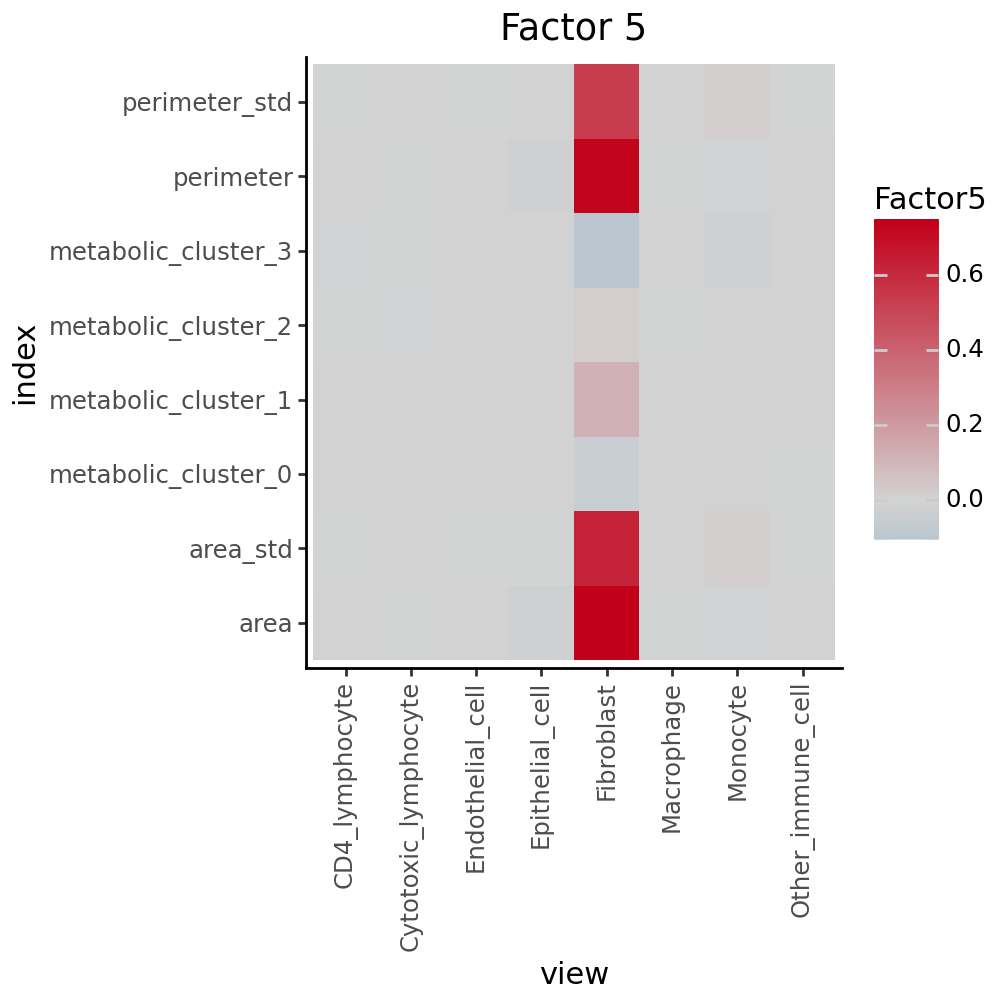

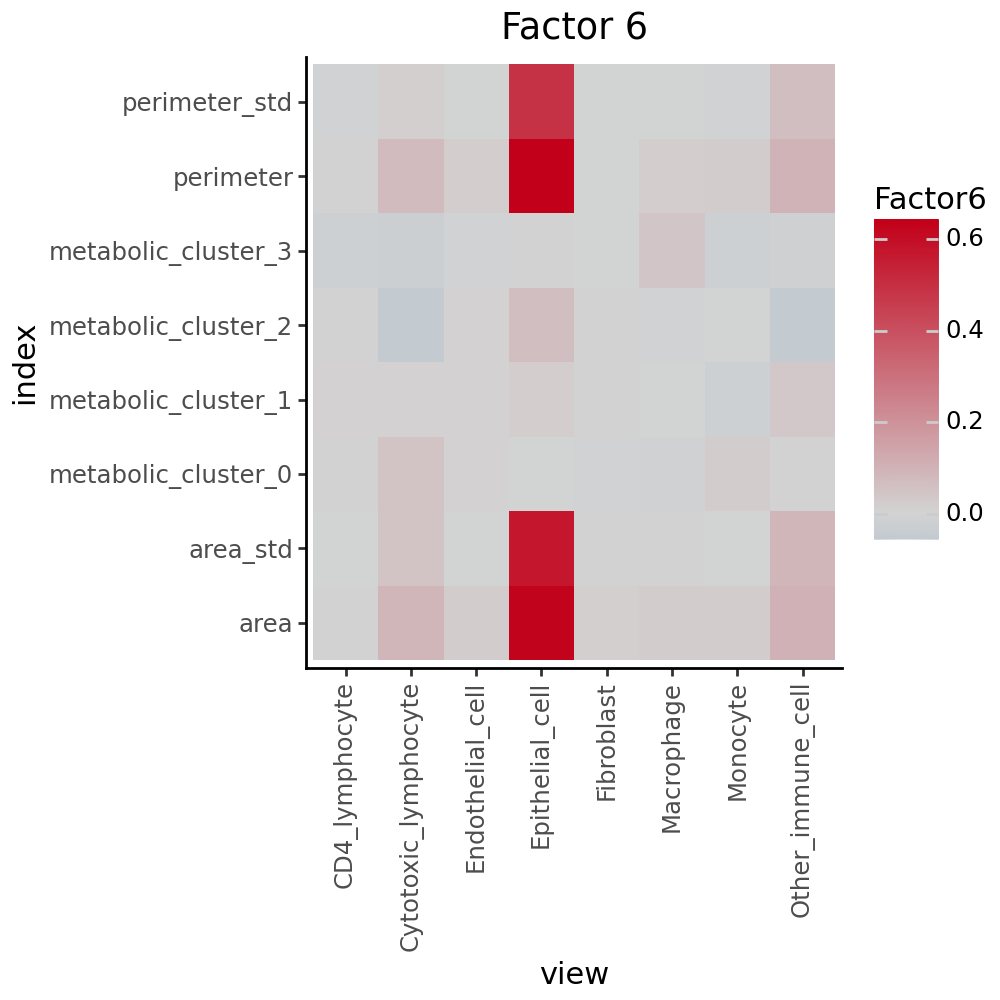

In [13]:
# get top genes with highest absolute loadings across all views
top_genes = variable_loadings['index'].head(30)
top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

for fnum in range(1, n_factors+1):
    # plot them
    # dotplot of variable, view, loadings
    gp = (ggplot(top_loadings) +
        ggtitle(f"Factor {fnum}") +
        aes(x='view', y='index', fill=f'Factor{fnum}') +
        geom_tile() +
        scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
        theme_classic() +
        theme(axis_text_x=element_text(angle=90, hjust=0.5), figure_size=(5, 5))
    )
    gp.show()

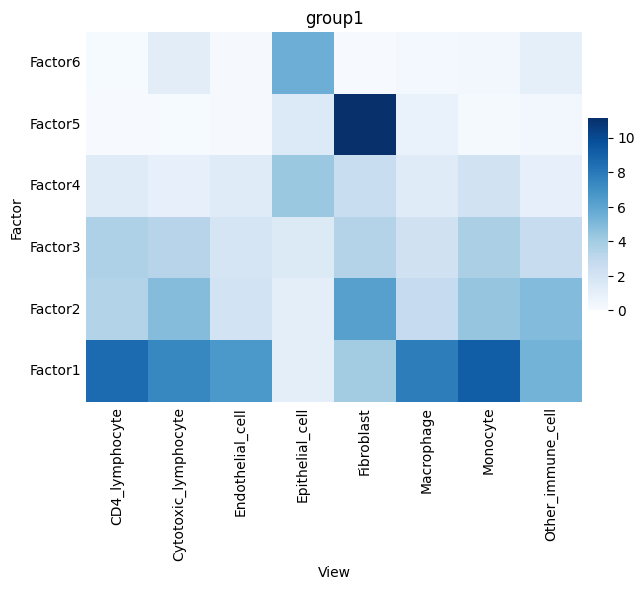

In [14]:
model = mofa.mofa_model('../../data/mofacell_sim.h5ad')
mofa.plot_r2(model, x='View')

In [15]:
model.close()